# Groundwater Recharge Prediction Model

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df2 = pd.DataFrame()
n = [3, 4, 5, 12, 13, 14, 23, 24, 25, 44]
for i in range(1, 76):
    if i not in n:
        df = pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\Dataset\District Wise\\3\\" + str(i) + ".xlsx")
        df1 = df.drop([ 'Latitude','Longitude','Year'], axis=1)
        df2 = pd.concat([df2, df1])

In [4]:
df2

,District,Slope,Soil Type,LULC,Max Temperature,Min Temperature,Precipitation,Groundwater Recharge,Evapotranspiration,Aridity Index
0,Faridkot,0.496398,Builtup,Agriculture,42.902,21.724,74.26,0.09,4.90,15.155102
1,Faridkot,0.496398,Builtup,Agriculture,45.352,23.562,39.16,-0.83,5.02,7.800797
2,Faridkot,0.496398,Builtup,Agriculture,41.710,22.326,120.64,1.48,4.64,26.000000
3,Faridkot,0.496398,Builtup,Agriculture,43.788,22.494,79.64,-0.30,4.76,16.731092
4,Faridkot,0.496398,Builtup,Agriculture,42.016,22.742,105.90,0.80,4.58,23.122271
...,...,...,...,...,...,...,...,...,...,...
29,Shahid Bhagat Singh Nagar,2.827676,Calcaric Fluvisols,Builtup,41.738,21.140,216.40,-0.50,4.12,52.524272
30,Shahid Bhagat Singh Nagar,2.827676,Calcaric Fluvisols,Builtup,42.502,22.722,210.86,-0.30,4.14,50.932367
31,Shahid Bhagat Singh Nagar,2.827676,Calcaric Fluvisols,Builtup,42.956,21.792,233.44,-0.65,4.20,55.580952
32,Shahid Bhagat Singh Nagar,2.827676,Calcaric Fluvisols,Builtup,42.238,22.246,246.28,-0.10,3.98,61.879397


### Data Preprocessing

In [6]:
df2['Soil Type'].unique()

array(['Builtup', 'Haplic Calcisols', 'Bulitup', 'Loam',
       'Haplic Luvisols', 'Calcaric Fluvisols'], dtype=object)

In [7]:
df2['LULC'].unique()

array(['Agriculture', 'Builtup', 'Forest', 'Lake'], dtype=object)

In [8]:
df2['Soil Type'] = df2['Soil Type'].replace('Builtup', 1)
df2['Soil Type'] = df2['Soil Type'].replace('Bulitup', 1)

df2['Soil Type'] = df2['Soil Type'].replace('Haplic Luvisols', 2)
df2['Soil Type'] = df2['Soil Type'].replace('Haplic Calcisols', 3)
df2['Soil Type'] = df2['Soil Type'].replace('Loam', 4)
df2['Soil Type'] = df2['Soil Type'].replace('Calcaric Fluvisols', 5)


In [10]:
X = df2.drop('Groundwater Recharge', axis=1)
y = df2['Groundwater Recharge']

In [11]:
X = pd.get_dummies(X)

In [12]:
X

,Slope,Soil Type,Max Temperature,Min Temperature,Precipitation,Evapotranspiration,Aridity Index,District_Amritsar,District_Barnala,District_Bathinda,...,District_Mohali,District_Patiala,District_Rupnagar,District_Sangrur,District_Shahid Bhagat Singh Nagar,District_Tarn Taran,LULC_Agriculture,LULC_Builtup,LULC_Forest,LULC_Lake
0,0.496398,1,42.902,21.724,74.26,4.90,15.155102,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.496398,1,45.352,23.562,39.16,5.02,7.800797,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.496398,1,41.710,22.326,120.64,4.64,26.000000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.496398,1,43.788,22.494,79.64,4.76,16.731092,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.496398,1,42.016,22.742,105.90,4.58,23.122271,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,2.827676,5,41.738,21.140,216.40,4.12,52.524272,0,0,0,...,0,0,0,0,1,0,0,1,0,0
30,2.827676,5,42.502,22.722,210.86,4.14,50.932367,0,0,0,...,0,0,0,0,1,0,0,1,0,0
31,2.827676,5,42.956,21.792,233.44,4.20,55.580952,0,0,0,...,0,0,0,0,1,0,0,1,0,0
32,2.827676,5,42.238,22.246,246.28,3.98,61.879397,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [100]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [13]:
X

,Slope,Soil Type,Max Temperature,Min Temperature,Precipitation,Evapotranspiration,Aridity Index,District_Amritsar,District_Barnala,District_Bathinda,...,District_Mohali,District_Patiala,District_Rupnagar,District_Sangrur,District_Shahid Bhagat Singh Nagar,District_Tarn Taran,LULC_Agriculture,LULC_Builtup,LULC_Forest,LULC_Lake
0,0.496398,1,42.902,21.724,74.26,4.90,15.155102,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.496398,1,45.352,23.562,39.16,5.02,7.800797,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.496398,1,41.710,22.326,120.64,4.64,26.000000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.496398,1,43.788,22.494,79.64,4.76,16.731092,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.496398,1,42.016,22.742,105.90,4.58,23.122271,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,2.827676,5,41.738,21.140,216.40,4.12,52.524272,0,0,0,...,0,0,0,0,1,0,0,1,0,0
30,2.827676,5,42.502,22.722,210.86,4.14,50.932367,0,0,0,...,0,0,0,0,1,0,0,1,0,0
31,2.827676,5,42.956,21.792,233.44,4.20,55.580952,0,0,0,...,0,0,0,0,1,0,0,1,0,0
32,2.827676,5,42.238,22.246,246.28,3.98,61.879397,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [102]:
joblib.dump(scaler,"B:\GroundwaterRech\GithubRepo\Restart\Results\Pretrained Model\scaler(Pre-Post).pkl")

['B:\\GroundwaterRech\\GithubRepo\\Restart\\Results\\Pretrained Model\\scaler(Pre-Post).pkl']

### MOdel Training

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import hydroeval as he
from sklearn.utils import resample
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [15]:
# train_data1, valid_data, train_labels1, valid_labels = train_test_split(X, y, test_size=0.1, random_state=42)
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
train_data.shape

(1768, 27)

In [17]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)  #For cross validation

In [19]:
d = {} # Dictionary to Store Results

In [20]:
# Function to Calculate NSE
def calculate_nse(observed, predicted):
    observed = np.array(observed)
    predicted = np.array(predicted)

    mean_observed = np.mean(observed)

    sse = np.sum((observed - predicted) ** 2)

    sv = np.sum((observed - mean_observed) ** 2)
    nse = 1 - (sse / sv)
    return nse

In [21]:
# Function To get best Hyper Paramas
def hpt(model, params):
    grid_search = GridSearchCV(model, param_grid=params, n_jobs=-1, cv=kfold, scoring='neg_mean_squared_error',
                               return_train_score=True)
    grid_result = grid_search.fit(train_data, train_labels)
    print(f'Best Score: {grid_result.best_score_}\nParams: {grid_result.best_params_}')
    rcscore = grid_result.score(test_data, test_labels)
    print(f'Test_score: {rcscore}')

In [22]:
# Function to train Model
def train_model(model, name):
    model.fit(train_data, train_labels)
    y_pred = model.predict(test_data)
    y_pred_train = model.predict(train_data)
    r2 = r2_score(test_labels, y_pred)
    ms = mean_squared_error(test_labels, y_pred)
    print(f'R2_score: {r2}, RMSE: {math.sqrt(ms)}')

    train_score = mean_squared_error(train_labels, y_pred_train)
    test_score = mean_squared_error(test_labels, y_pred)
    r2_s = r2_score(test_labels, y_pred)
    mae_test = mean_absolute_error(test_labels, y_pred)
    mae_train = mean_absolute_error(train_labels, y_pred_train)

    n1 = len(y_pred)
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2_s) * (n1 - 1) / (n1 - p - 1)

    a = test_labels
    b = y_pred
    c2 = a.sub(b, fill_value=0)
    d2 = c2.pow(2)
    d_sum2 = d2.sum()
    a_mean2 = a.mean()
    e2 = ((a - a_mean2).pow(2).sum())
    f = 1 - (d_sum2 / e2)
    print(f'MAE_train: {mae_train}    MAE_test:{mae_test}     NSE2:{calculate_nse(a, b)}')
    print(f'MSE_train:  {train_score}  MSE_test: {test_score}')
    print(f'adjusted_R2:{adj_r2}')
    print(f'NSE:{he.nse(np.array(y_pred), np.array(test_labels))}')
    d[name] = (train_score, test_score, r2_s, mae_train, mae_test, f, adj_r2)
    # fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    plt.figure(figsize=(8, 4))
    # sns.scatterplot(x=test_labels, y=y_pred)
    sns.scatterplot(x=test_labels, y=y_pred)
    coefficients = np.polyfit(test_labels, y_pred, 1)
    trendline_x = np.linspace(min(test_labels), max(test_labels), 100)
    trendline_y = np.polyval(coefficients, trendline_x)
    plt.plot(trendline_x, trendline_y, linestyle='dotted', color='red')
    plt.xlabel('True Groundwater Recharge (m)',fontsize=13,fontweight='bold')
    plt.ylabel('Predicted Groundwater Recharge (m)',fontsize=13,fontweight='bold')
    plt.title(f'Scatter Plot: {name}',fontsize=14,fontweight='bold')
    # plt.grid(False)
    plt.tight_layout()
    plt.savefig(f"B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Model Performance Plots\\{name}_Scatterplot.png",dpi=1200)
    plt.show()

    plt.figure(figsize=(7, 4))
    sns.lineplot(x=range(1, len(test_labels) + 1), y=test_labels, label='Actual')
    sns.lineplot(x=range(1, len(y_pred) + 1), y=y_pred, label='Predicted')
    plt.xlabel('Test Data (Years)',fontsize=13,fontweight='bold')
    plt.ylabel('Groundwater Recharge (m)',fontsize=13,fontweight='bold')
    plt.title(f'Line Plot: {name}',fontsize=14,fontweight='bold')
    plt.legend()
    # plt.grid(False)

    plt.tight_layout()

    # Display the line plot

    plt.savefig(f"B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Model Performance Plots\\{name}_Lineplot.png",dpi=1200)
    plt.show()
    joblib.dump(model,"B:\GroundwaterRech\GithubRepo\Restart\Results\Pretrained Model\Pre-post\\"+str(name)+".pkl")

R2_score: 0.8762559390911205, RMSE: 0.8172079005968814
MAE_train: 0.28691870712660966    MAE_test:0.4947978644001106     NSE2:0.8762559390911205
MSE_train:  0.2130560910048231  MSE_test: 0.6678287527979624
adjusted_R2:0.8681856742492371
NSE:0.8762559390911205


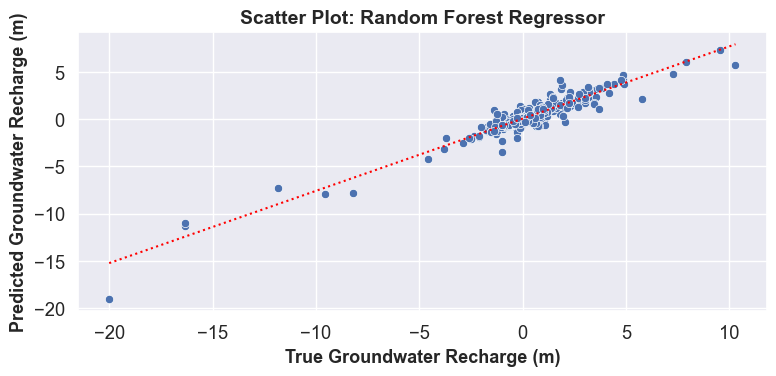

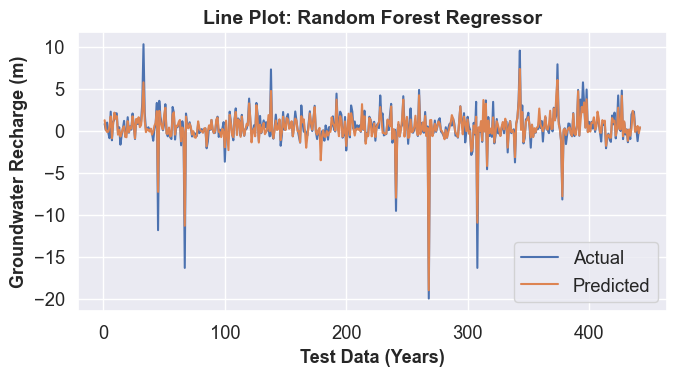

In [115]:
#Random Forest
train_model(RandomForestRegressor(max_depth=14, max_features=19, random_state=45), "Random Forest Regressor")

In [ ]:
hpt(RandomForestRegressor(), {'max_depth': [i for i in range(8, 15)], 'max_features': [i for i in range(2, 20)]})

R2_score: 0.7345565058024285, RMSE: 1.1968960049436632
MAE_train: 0.18286657679920218    MAE_test:0.4654454103800884     NSE2:0.7345565058024285
MSE_train:  0.199371397820057  MSE_test: 1.4325600466501014
adjusted_R2:0.7172449735721521
NSE:0.7345565058024285


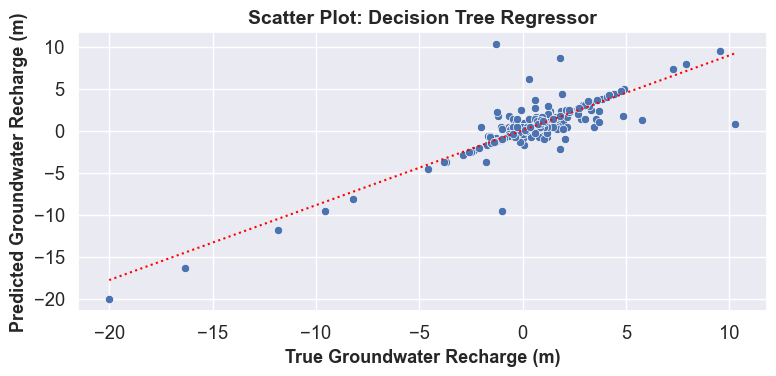

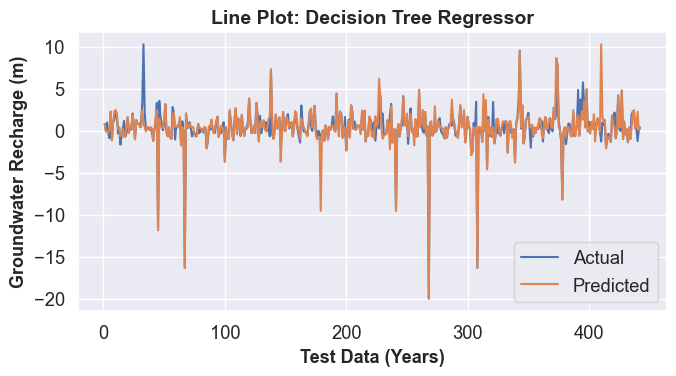

In [116]:
#Decision Tree
train_model(DecisionTreeRegressor(max_depth=14, max_features=19, random_state=45), "Decision Tree Regressor")

In [ ]:
hpt(DecisionTreeRegressor(), {'max_depth': [i for i in range(8, 15)], 'max_features': [i for i in range(2, 20)]})

R2_score: 0.9321658616755933, RMSE: 0.60505454962137
MAE_train: 0.207143451173204    MAE_test:0.38666206604900366     NSE2:0.9321658616755933
MSE_train:  0.08706331617544405  MSE_test: 0.36609100801751887
adjusted_R2:0.9277418961326973
NSE:0.9321658616755933


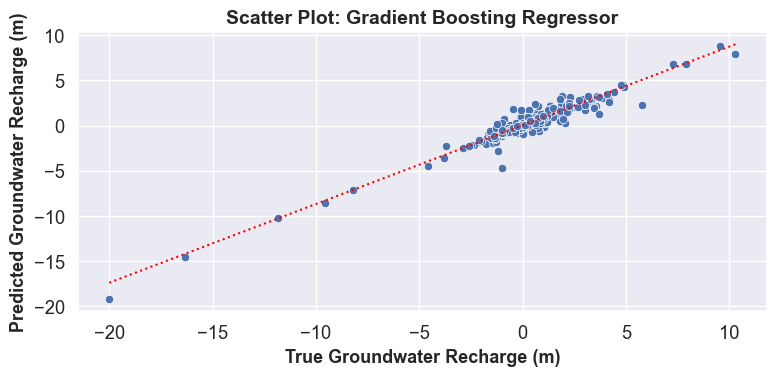

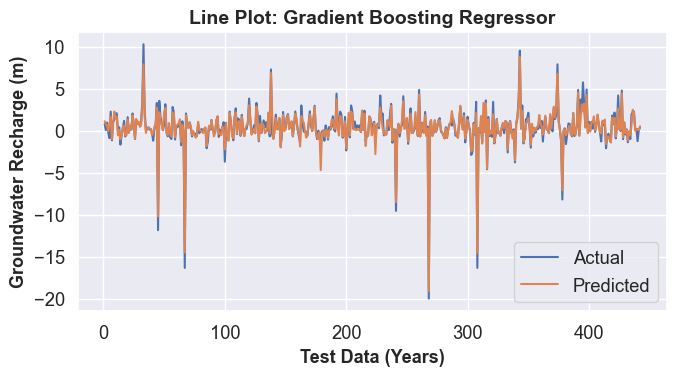

In [117]:
#GBR
train_model(GradientBoostingRegressor(max_depth=7, max_features=14, n_estimators=100, random_state=10),
            name='Gradient Boosting Regressor')

In [ ]:
hpt(GradientBoostingRegressor(), {'max_depth': [i for i in range(8, 15)], 'max_features': [i for i in range(10, 20)],
                                  'n_estimators': [100, 150, 500]})

R2_score: 0.946230483236972, RMSE: 0.5386894141700869
MAE_train: 0.09629669924263466    MAE_test:0.29685493999501555     NSE2:0.946230483236972
MSE_train:  0.02712302995568212  MSE_test: 0.2901862849389114
adjusted_R2:0.9427237756219919
NSE:0.946230483236972


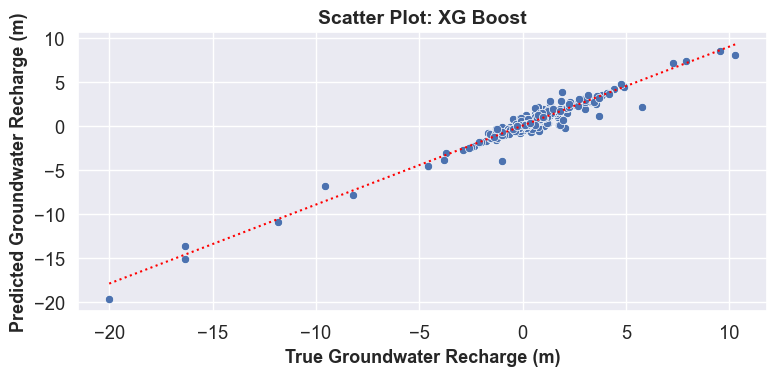

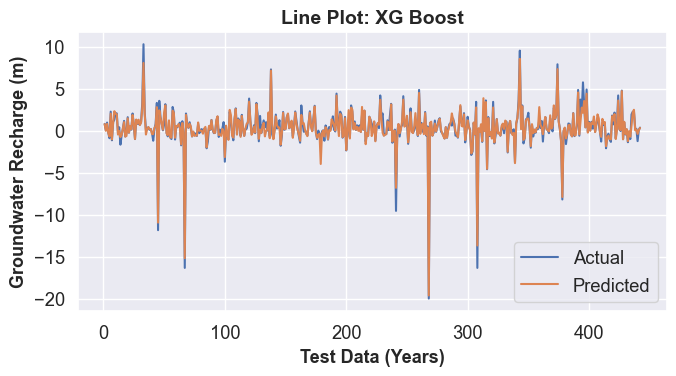

In [118]:
import xgboost
train_model(xgboost.XGBRegressor(learning_rate=0.1, max_depth=8, n_estimators=150, random_state=45), 'XG Boost')

### Uncertainity Analysis

In [72]:
n_bootstrap = 1000
bootstrap_predictions = np.zeros((n_bootstrap, len(test_labels)))
for i in range(n_bootstrap):
    X_boot, y_boot = resample(train_data, train_labels, random_state=i)
    xgb_boot = xgboost.XGBRegressor(learning_rate=0.1, max_depth=8, n_estimators=150, random_state=i)
    xgb_boot.fit(X_boot, y_boot)

    bootstrap_predictions[i] = xgb_boot.predict(test_data)

In [74]:
mean_predictions = np.mean(bootstrap_predictions, axis=0)
std_predictions = np.std(bootstrap_predictions, axis=0)
mse_mean = mean_squared_error(test_labels, mean_predictions)
r2_mean=r2_score(test_labels,mean_predictions)
mean_mae=mean_absolute_error(test_labels,mean_predictions)

In [75]:
cv = std_predictions / mean_predictions
mean_cv = np.mean(cv)

In [ ]:
print(f"Mean Squared Error: {mse_mean}\nMAE: {mean_mae}\nr2: {r2_mean}\nCV: {mean_cv}")

In [77]:
confidence_interval = np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)

C:\Users\shash\AppData\Local\Temp\ipykernel_12724\3048951786.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.fill_between(range(len(test_labels[:100])), confidence_interval[0][:100], confidence_interval[1][:100], color='gray', alpha=0.4, label='95% Confidence Interval')
C:\Users\shash\AppData\Local\Temp\ipykernel_12724\3048951786.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(range(len(test_labels[:100])), test_labels[:100], label='True Values')
C:\Users\sha

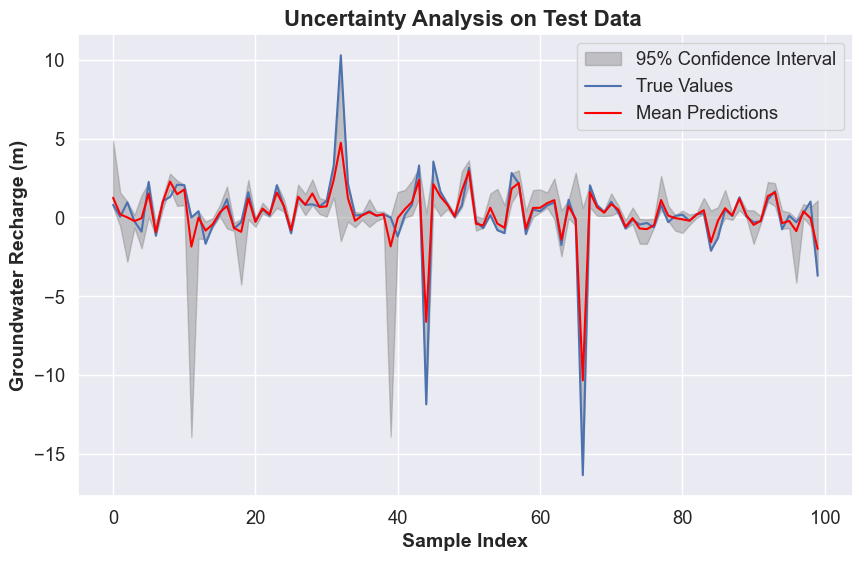

In [78]:
plt.figure(figsize=(10, 6))
plt.fill_between(range(len(test_labels[:100])), confidence_interval[0][:100], confidence_interval[1][:100], color='gray', alpha=0.4, label='95% Confidence Interval')

plt.plot(range(len(test_labels[:100])), test_labels[:100], label='True Values')
plt.plot(range(len(test_labels[:100])), mean_predictions[:100], label='Mean Predictions', color='red')

plt.title('Uncertainty Analysis on Test Data ',fontsize=16,fontweight='bold')
plt.xlabel('Sample Index',fontsize=14,fontweight='bold')
plt.ylabel('Groundwater Recharge (m)',fontsize=14,fontweight='bold')
plt.legend()
plt.grid(True)
plt.savefig('B:\GroundwaterRech\GithubRepo\Restart\Results\Images\\uncertainty1(pre-post).png', dpi=1200)
plt.show()

In [33]:
m=joblib.load("B:\GroundwaterRech\GithubRepo\Restart\Results\Pretrained Model\\"+str("XG Boost")+".pkl")

In [ ]:
hpt(xgboost.XGBRegressor(),
    {'max_depth': [i for i in range(10, 15)], 'n_estimators': [100, 150, 250, 400],
     'learning_rate': [0.1, 0.01, 0.001], })

In [ ]:
import lightgbm as lgb

train_model(lgb.LGBMRegressor(max_depth=13, n_estimators=800, learning_rate=0.1, colsample_bytree=0.9, subsample=0.8,
                              random_state=45), 'LGBM Regressor')

In [ ]:
hpt(lgb.LGBMRegressor(),
    {'max_depth': [i for i in range(10, 15)], 'n_estimators': [100, 500, 1000], 'learning_rate': [0.1, 0.01, 0.001],
     'subsample': [0.8, 0.9, 1.0],
     'colsample_bytree': [0.8, 0.9, 1.0]})

Linear Regression Models

In [ ]:
#Linear Regression
train_model(LinearRegression(), "Linear Regression")

R2_score: 0.12942750255284163, RMSE: 2.167568575248443
MAE_train: 1.0269974601320504    MAE_test:1.0872990484782779     NSE2:0.12942750255284163
MSE_train:  3.526120953532858  MSE_test: 4.698353528404564
adjusted_R2:0.07265103532802697
NSE:0.12942750255284163


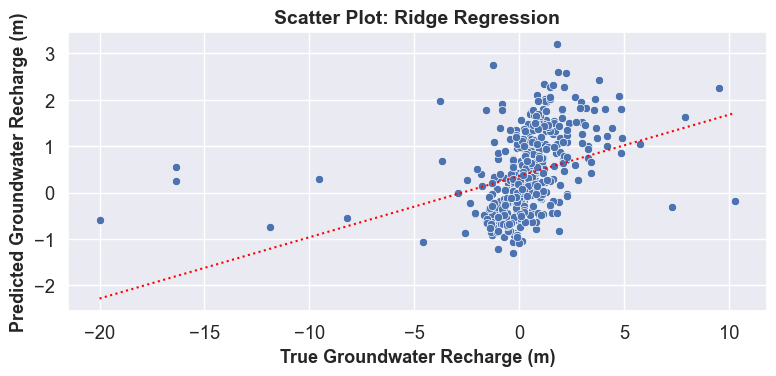

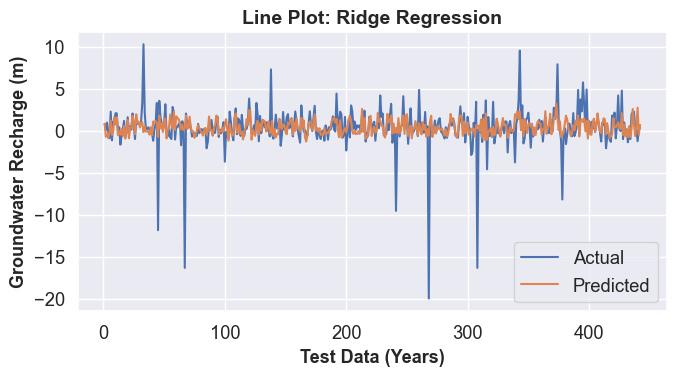

In [121]:
#Ridge Regression
train_model(Ridge(alpha=10), 'Ridge Regression')

In [ ]:
hpt(Ridge(), {'alpha': [0.1, 1, 10, 100, 0.01]})

Polynomial Regression

0.17481748784232853 2.1103057502944855


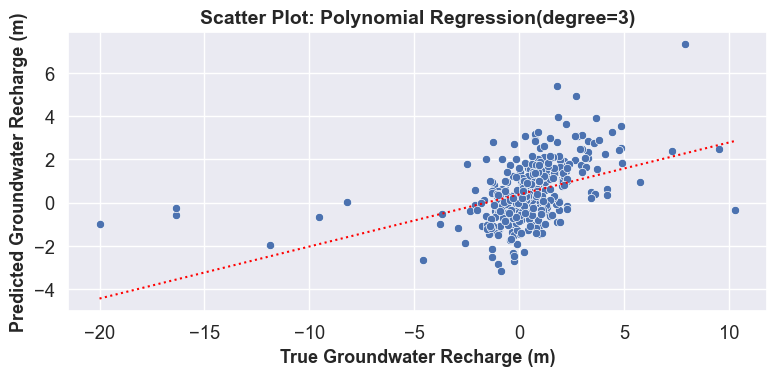

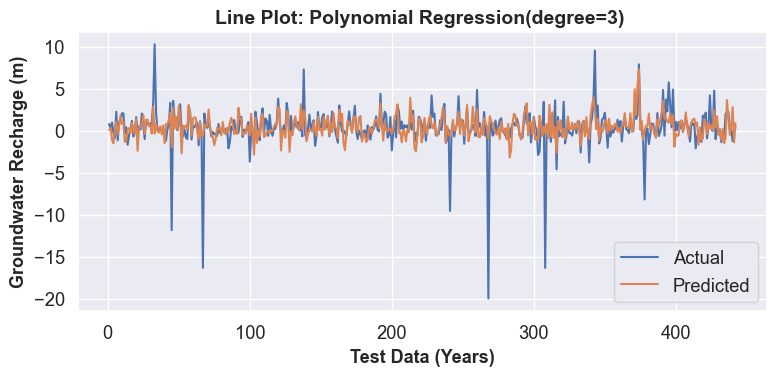

In [130]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(train_data)
x_test_poly = poly.fit_transform(test_data)

plr = LinearRegression()
plr.fit(x_train_poly, train_labels)
y_pred = plr.predict(x_test_poly)
y_pred_train = plr.predict(x_train_poly)
r2 = r2_score(test_labels, y_pred)
ms = mean_squared_error(test_labels, y_pred)
print(r2, math.sqrt(ms))

train_score = mean_squared_error(train_labels, y_pred_train)
test_score = mean_squared_error(test_labels, y_pred)
r2_s = r2_score(test_labels, y_pred)
mae_test = mean_absolute_error(test_labels, y_pred)
mae_train = mean_absolute_error(train_labels, y_pred_train)

a = test_labels
b = y_pred
c2 = a.sub(b, fill_value=0)
d2 = c2.pow(2)
d_sum2 = d2.sum()
a_mean2 = a.mean()
e2 = ((a - a_mean2).pow(2).sum())
f = 1 - (d_sum2 / e2)

n1 = len(y_pred)
p = X.shape[1]
adj_r2 = 1 - (1 - r2_s) * (n1 - 1) / (n1 - p - 1)
d['Polynomial Regression'] = (train_score, test_score, r2_s, mae_train, mae_test, f,adj_r2)

plt.figure(figsize=(8, 4))
# sns.scatterplot(x=test_labels, y=y_pred)
sns.scatterplot(x=test_labels, y=y_pred)
coefficients = np.polyfit(test_labels, y_pred, 1)
trendline_x = np.linspace(min(test_labels), max(test_labels), 100)
trendline_y = np.polyval(coefficients, trendline_x)
plt.plot(trendline_x, trendline_y, linestyle='dotted', color='red')
plt.xlabel('True Groundwater Recharge (m)',fontsize=13,fontweight='bold')
plt.ylabel('Predicted Groundwater Recharge (m)',fontsize=13,fontweight='bold')
plt.title(f'Scatter Plot: Polynomial Regression(degree=3)',fontsize=14,fontweight='bold')
# plt.grid(False)
plt.tight_layout()
plt.savefig(f"B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Model Performance Plots\PolynomialReg_Scatterplot.png",dpi=1200)
plt.show()

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(1, len(test_labels) + 1), y=test_labels, label='Actual')
sns.lineplot(x=range(1, len(y_pred) + 1), y=y_pred, label='Predicted')
plt.xlabel('Test Data (Years)',fontsize=13,fontweight='bold')
plt.ylabel('Groundwater Recharge (m)',fontsize=13,fontweight='bold')
plt.title(f'Line Plot: Polynomial Regression(degree=3) ',fontsize=14,fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig(f"B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Model Performance Plots\PolynomialReg_Lineplot.png",dpi=1200)

# Display the line plot
plt.show()

In [41]:
d

{'Random Forest Regressor': (0.1941043389779552,
  0.715279168213136,
  0.8206319582130754,
  0.2717698837468988,
  0.5015516294697682,
  0.8206319582130754,
  0.7955390197247492),
 'Decision Tree Regressor': (0.12067507419821044,
  0.6738183918544478,
  0.8310289313068138,
  0.15793975116179862,
  0.3270072198699658,
  0.8310289313068138,
  0.8073904916450727),
 'Gradient Boosting Regressor': (0.013167583460495055,
  0.1840892323968188,
  0.9538365905279148,
  0.017627908592156,
  0.1808040509545095,
  0.9538365905279148,
  0.9473784969748251),
 'XG Boost': (0.013153600622544049,
  0.297113611284905,
  0.9254938644759538,
  0.016250672478548892,
  0.20804871032579952,
  0.9254938644759538,
  0.9150707263456469),
 'LGBM Regressor': (0.027821508681515825,
  0.37071491906008547,
  0.9070371233386849,
  0.08272554316126454,
  0.3036173815380016,
  0.9070371233386849,
  0.8940319540648222),
 'Linear Regression': (3.6863071873603426,
  3.5979210285476366,
  0.09776199549224418,
  1.05905668

### ANN

In [124]:
import tensorflow as tf

In [125]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(25, input_shape=(27,), activation='relu'),
    # tf.keras.layers.Dropout()
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [126]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [127]:
model.fit(train_data, train_labels, epochs=150, batch_size=32)

Epoch 1/150
56/56 [==============================] - 1s 7ms/step - loss: 4.0376
Epoch 2/150
56/56 [==============================] - 0s 6ms/step - loss: 3.7814
Epoch 3/150
56/56 [==============================] - 0s 6ms/step - loss: 3.6799
Epoch 4/150
56/56 [==============================] - 0s 6ms/step - loss: 3.7065
Epoch 5/150
56/56 [==============================] - 0s 6ms/step - loss: 3.7381
Epoch 6/150
56/56 [==============================] - 0s 6ms/step - loss: 3.6279
Epoch 7/150
56/56 [==============================] - 0s 6ms/step - loss: 3.6647
Epoch 8/150
56/56 [==============================] - 0s 6ms/step - loss: 3.5263
Epoch 9/150
56/56 [==============================] - 0s 6ms/step - loss: 3.5529
Epoch 10/150
56/56 [==============================] - 0s 6ms/step - loss: 3.5000
Epoch 11/150
56/56 [==============================] - 0s 6ms/step - loss: 3.4492
Epoch 12/150
56/56 [==============================] - 0s 7ms/step - loss: 3.4536
Epoch 13/150
56/56 [=================

In [128]:
# Evaluate the model on the test set
test_score = model.evaluate(test_data, test_labels)
train_score = model.evaluate(train_data, train_labels)
y_pred = model.predict(test_data)
y_pred_train = model.predict(train_data)
print(f'Mean squared error on test set: {test_score} train set: {train_score}')
print("R2 square", r2_score(test_labels, y_pred))

56/56 [==============================] - 0s 2ms/step
Mean squared error on test set: 1.9183177947998047 train set: 0.45587262511253357
R2 square 0.6445489887528707


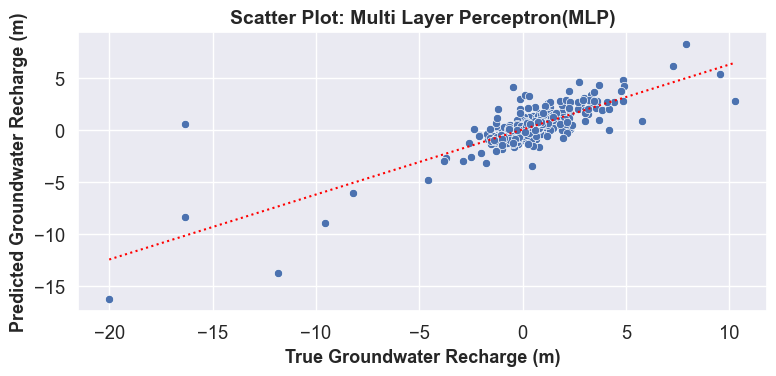

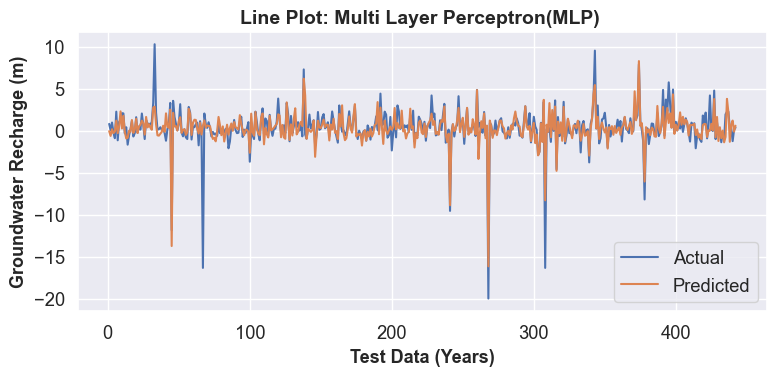

In [129]:
train_score = mean_squared_error(train_labels, np.squeeze(y_pred_train))
test_score = mean_squared_error(test_labels, np.squeeze(y_pred))
r2_s = r2_score(test_labels, np.squeeze(y_pred))
mae_test = mean_absolute_error(test_labels, np.squeeze(y_pred))
mae_train = mean_absolute_error(train_labels, np.squeeze(y_pred_train))

n1 = len(y_pred)
p = X.shape[1]
adj_r2 = 1 - (1 - r2_s) * (n1 - 1) / (n1 - p - 1)
a, b = list(test_labels), list(y_pred)
n = 0
d1 = 0
d_mean = test_labels.mean()
for i in range(len(y_pred)):
    n = n + math.pow((a[i] - b[i]), 2)
    d1 = d1 + math.pow((a[i] - d_mean), 2)
nse = 1 - (n / d1)



d['MLP'] = (train_score, test_score, r2_s, mae_train, mae_test, nse,adj_r2)


plt.figure(figsize=(8, 4))
# sns.scatterplot(x=test_labels, y=y_pred)
sns.scatterplot(x=test_labels, y=np.squeeze(y_pred))
coefficients = np.polyfit(test_labels, np.squeeze(y_pred), 1)
trendline_x = np.linspace(min(test_labels), max(test_labels), 100)
trendline_y = np.polyval(coefficients, trendline_x)
plt.plot(trendline_x, trendline_y, linestyle='dotted', color='red')
plt.xlabel('True Groundwater Recharge (m)',fontsize=13,fontweight='bold')
plt.ylabel('Predicted Groundwater Recharge (m)',fontsize=13,fontweight='bold')
plt.title(f'Scatter Plot: Multi Layer Perceptron(MLP)',fontsize=14,fontweight='bold')
# plt.grid(False)
plt.tight_layout()
plt.savefig(f"B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Model Performance Plots\MLP_Scatterplot.png",dpi=1200)

plt.show()

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(1, len(test_labels) + 1), y=test_labels, label='Actual')
sns.lineplot(x=range(1, len(np.squeeze(y_pred)) + 1), y=np.squeeze(y_pred), label='Predicted')
plt.xlabel('Test Data (Years)',fontsize=13,fontweight='bold')
plt.ylabel('Groundwater Recharge (m)',fontsize=13,fontweight='bold')
plt.title(f'Line Plot: Multi Layer Perceptron(MLP) ',fontsize=14,fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig(f"B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Model Performance Plots\MLP_Lineplot.png",dpi=1200)

# Display the line plot
plt.show()

In [ ]:
d

In [ ]:
df = pd.DataFrame.from_dict(d, orient='index',
                            columns=['Train MSE', 'Test MSE', 'R2_score', 'Train MAE', 'Test MAE', 'NSE','Adj_r2'])
df.to_excel('Models_Results(Districts).xlsx')